<a href="https://colab.research.google.com/github/busra18/endustri4.0-AI-uretim-hata-tespiti/blob/main/END%C3%9CSTR%C4%B0EL_4_0_AI_%C3%9CRET%C4%B0M_HATA_TESP%C4%B0T%C4%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libraries
import os
import glob
import pickle
import tensorflow as tf    # used for creating tensors out of the dataset and training the model
import tensorflow_hub as hub    # downloading and using pre-trained models
import numpy as np
import h5py   # to manipulate the dataset as it's in `.h5` format
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report   # essential for model's evaluation
from sklearn.metrics import f1_score
from tqdm import tqdm   # getting a progress bar for an iterable object

In [2]:
# install kaggle library
!pip install -q kaggle

# create a hidden kaggle directory
!mkdir ~/.kaggle

# copy the `.json` file containing user's API token
!cp kaggle.json ~/.kaggle/

# making the `.json` file executable
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# download the `textile defect detection` dataset
!kaggle datasets download -d belkhirnacim/textiledefectdetection

Dataset URL: https://www.kaggle.com/datasets/belkhirnacim/textiledefectdetection
License(s): CC-BY-NC-SA-4.0
100% 3.39G/3.40G [00:30<00:00, 113MB/s]
100% 3.40G/3.40G [00:30<00:00, 121MB/s]


In [4]:
# unzip the dataset
!unzip textiledefectdetection.zip

Archive:  textiledefectdetection.zip
  inflating: matchingtDATASET_test_32.h5  
  inflating: matchingtDATASET_test_64.h5  
  inflating: matchingtDATASET_train_32.h5  
  inflating: matchingtDATASET_train_64.h5  
  inflating: test32.csv              
  inflating: test32.h5               
  inflating: test64.csv              
  inflating: test64.h5               
  inflating: train32.csv             
  inflating: train32.h5              
  inflating: train64.csv             
  inflating: train64.h5              


In [5]:
# load the `train64.csv` file
train_df64 = pd.read_csv("/content/train64.csv")
train_df64["indication_type"] = train_df64.indication_type.apply(lambda row: "damaged" if row!="good" else "good")
train_df64["indication_value"] = train_df64.indication_value.apply(lambda row: 1 if row!=0 else 0)
train_df64.head()

,index,angle,indication_type,indication_value,split
0,48000,0,good,0,train
1,48001,80,good,0,train
2,48002,100,good,0,train
3,48003,100,good,0,train
4,48004,0,good,0,train


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['angle'].plot(kind='hist', bins=20, title='angle')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='angle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['angle']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('angle')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['indication_value']
  ys = series['angle']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('indication_value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('indication_value')
_ = plt.ylabel('angle')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['indication_value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'indication_value'}, axis=1)
              .sort_values('indication_value', ascending=True))
  xs = counted['indication_value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('indication_value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('indication_value')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['angle'].plot(kind='line', figsize=(8, 4), title='angle')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# check the classes distribution
train_df64.indication_type.value_counts(normalize=True).round(2)

,proportion
indication_type,
damaged,0.83
good,0.17


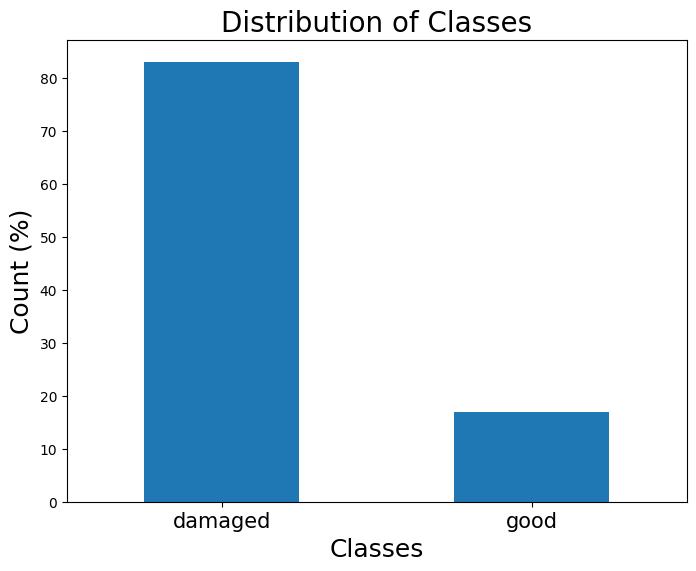

In [7]:
# plot the distribution of classes
(train_df64.indication_type.value_counts(normalize=True).round(2)*100).to_frame().plot.bar(legend=False, figsize=(8, 6))
plt.xlabel('Classes', fontsize=18)
plt.ylabel("Count (%)", fontsize=18)
plt.title("Distribution of Classes", fontsize=20)
plt.xticks(rotation=0, fontsize=15);

In [8]:
# create an object that will take the dataset and produce the dataset in a format required for tensorflow dataset's API
class H5ToStorage:
  def __init__(self, hdf_path, ds_name="train"):
    self.path = hdf_path

    self.classes = []
    with h5py.File(self.path, 'r') as hf:
      for class_ in hf:
        self.classes.append(class_)

    self.name = ds_name

  # a generator to load the (img, class, angle)
  def generate_img_arr(self):
    for class_ in self.classes:
      with h5py.File(self.path, 'r') as hf:
        for angle in hf[class_]:
            for img in hf[class_][f"{angle}"]:
                yield img, class_, angle

  # utilize the generator to create new images and load it back to Storage
  def generate_train_dirs(self):
    # create the dataset's directories
    path = f"./dataset/{self.name}"
    os.makedirs(f"{path}/good/")
    os.makedirs(f"{path}/damaged/")

    # random_bright = tf.keras.layers.RandomBrightness(factor=0.05)
    random_flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")

    gen = self.generate_img_arr()
    metadata = {}

    for i, data in enumerate(gen):
        img, label, angle = data
        if label == "good":
          for j in range(4):
            img_path = f"{path}/{label}/{i}_aug{j}.jpeg"
            img = random_flip(tf.expand_dims(np.squeeze(img), axis=2)*255., training=True)
            plt.imsave(img_path, np.squeeze(img), cmap="gray")
        else:
          img_path = f"{path}/damaged/{i}.jpeg"
          plt.imsave(img_path, np.squeeze(img)*255., cmap="gray")

        metadata[img_path] = angle
    return metadata

  def generate_test_dirs(self):
    # create the dataset's directories
    path = f"./dataset/{self.name}"
    os.makedirs(f"{path}/good/")
    os.makedirs(f"{path}/damaged/")

    gen = self.generate_img_arr()
    metadata = {}

    for i, data in enumerate(gen):
        img, label, angle = data
        if label == "good":
          img_path = f"{path}/{label}/{i}.jpeg"
          plt.imsave(img_path, np.squeeze(img)*255., cmap="gray")
        else:
          img_path = f"{path}/damaged/{i}.jpeg"
          plt.imsave(img_path, np.squeeze(img)*255., cmap="gray")

        metadata[img_path] = angle

    return metadata

  def to_storage(self):
    if self.name == "train":
      self.generate_train_dirs()

    elif self.name == "test":
      self.generate_test_dirs()

In [9]:
# generate train data
train_gen = H5ToStorage("/content/matchingtDATASET_train_64.h5", "train")
train_dict = train_gen.to_storage()

In [10]:
# generate test data
test_gen = H5ToStorage("/content/matchingtDATASET_test_64.h5", "test")
test_dict = test_gen.to_storage()

In [11]:
# train data & test data paths
test_dir = "/content/dataset/test"
train_dir = "/content/dataset/train"

In [12]:
# create train data pipeline
IMG_SIZE = (64, 64) # define image size
train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         image_size=IMG_SIZE,
                                                         color_mode="grayscale",
                                                         label_mode="int", #  label type is encoding of the form `[1, 2, 3, ...]`
                                                         batch_size=64) # batch_size is 32 by default, but 128 will be used for this use-case
# classes in train_data
class_names = train_data.class_names
print(f"The class_names are as follows: {class_names}")

train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE).\
                        cache()


# create test data pipeline
test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        image_size=IMG_SIZE,
                                                        color_mode="grayscale",
                                                        shuffle=False,
                                                        batch_size=64,
                                                        label_mode="int")

test_data = test_data.prefetch(buffer_size=tf.data.AUTOTUNE).\
                      cache()

Found 108000 files belonging to 2 classes.
The class_names are as follows: ['damaged', 'good']
Found 36000 files belonging to 2 classes.


In [13]:
# check the proportions of classes
damaged_counts = 0
for _ in os.listdir(f"{train_dir}/damaged"):
  damaged_counts += 1

good_counts = 0
for _ in os.listdir(f"{train_dir}/good"):
  good_counts += 1

total = damaged_counts + good_counts

new_train_df64 = pd.Series({"damaged": damaged_counts/total,
                            "good": good_counts/total}).round(2)
new_train_df64

,0
damaged,0.56
good,0.44


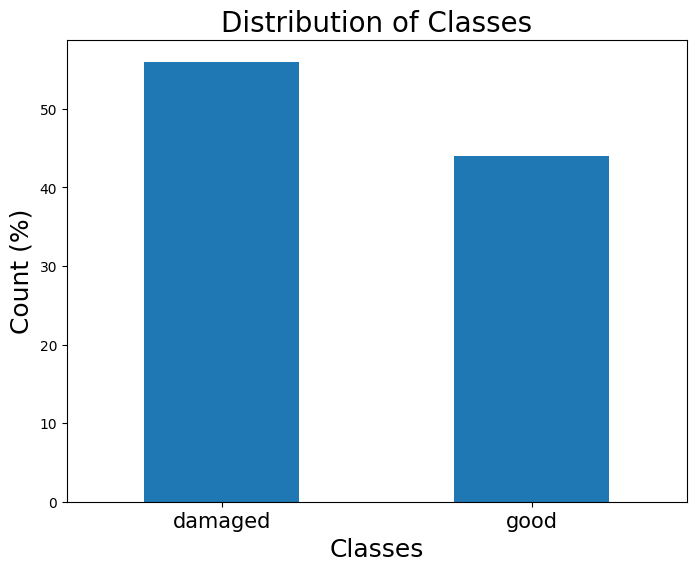

In [14]:
# check the classes distribution
(new_train_df64*100).to_frame().plot.bar(legend=False, figsize=(8, 6))
plt.xlabel('Classes', fontsize=18)
plt.ylabel("Count (%)", fontsize=18)
plt.title("Distribution of Classes", fontsize=20)
plt.xticks(rotation=0, fontsize=15);

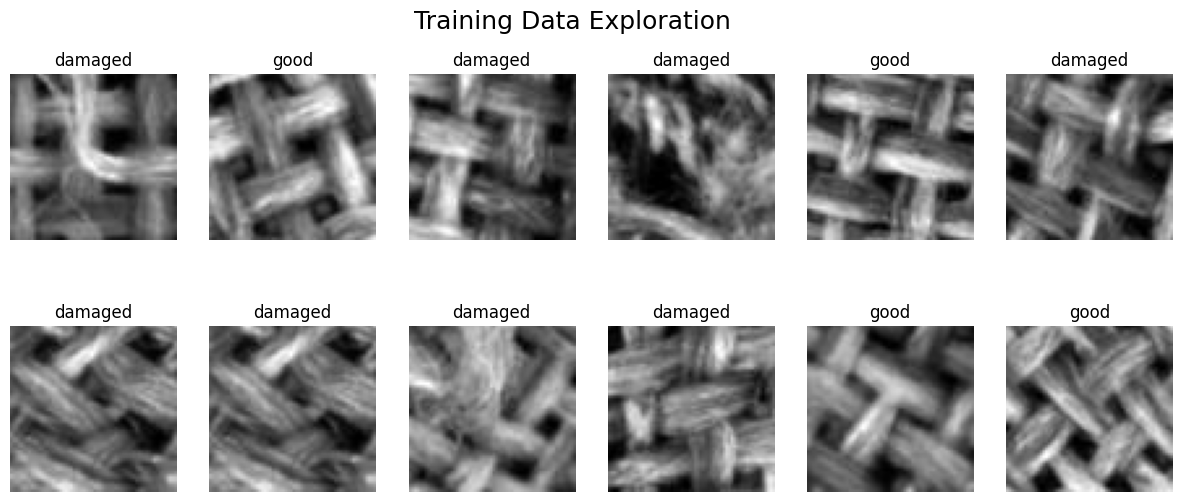

In [15]:
# explore the train data
def explore_data(n_rows, n_cols, figsize):
    count = 0
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize) # plot 20 figures
    fig.suptitle("Training Data Exploration", fontsize=18, y=0.95)
    for data, ax in zip(train_data.shuffle(10000).take(1).unbatch(), axs.ravel()):
        img, label = data

        ax.axis("off")
        ax.set_title(f"{class_names[label]}")
        ax.imshow(np.squeeze(img), cmap="gray")

        count+=1
        if count == n_rows*n_cols:
          break;

explore_data(n_rows=2, n_cols=6, figsize=(15, 6))

In [16]:
from tensorflow.keras import layers, models, regularizers

improved_model = models.Sequential([
    layers.Input(shape=(64, 64, 1), name="input_layer"),

    # 1. Block
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    # 2. Block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # 3. Block
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # 4. Block
    layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid', name="output_layer")
])

improved_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,785 (1.61 MB)

 Trainable params: 421,825 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

improved_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]


In [18]:
# define callbacks
# Setup ReduceLROnPlateau callback to reduce learning rate if model's val_loss doesn't improve for 1 epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=1,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3, # if val_accuracy decreases for 3 epochs in a row, stop training
                                                  restore_best_weights=True,
                                                  verbose=1)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers

# Orijinal benzer model (64x64 giriş)
baseline_model = Sequential([
    layers.Input(shape=(64, 64, 1), name="input_layer"),
    layers.Conv2D(3, kernel_size=1, padding="valid", activation="relu"),
    layers.Conv2D(16, kernel_size=2, activation="relu", padding="same"),
    layers.Conv2D(32, kernel_size=2, activation="relu", padding="same"),
    layers.Conv2D(64, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001), padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(128, kernel_size=4, activation="relu", kernel_regularizer=regularizers.l2(0.001), padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(512, kernel_size=4, activation="relu", kernel_regularizer=regularizers.l2(0.001), padding="same"),
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation="sigmoid", name="output_layer")
])

baseline_model.summary()

# compile
baseline_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

print("Baseline model tanımlandı ve derlendi.")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201,591 (4.58 MB)

 Trainable params: 1,201,591 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Baseline model tanımlandı ve derlendi.


In [20]:
# Mevcut mu kontrol et
print("'baseline_model' tanımlı mı?", 'baseline_model' in globals())


'baseline_model' tanımlı mı? True


In [21]:
# compile the `baseline_model`
baseline_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

In [22]:
# train the `baseline_model`
EPOCHS = 20
STEPS_PER_EPOCH = len(train_data)

baseline_training_history = baseline_model.fit(train_data,
                                               epochs=EPOCHS,
                                               steps_per_epoch=STEPS_PER_EPOCH,
                                               validation_data=test_data.shuffle(10000),
                                               validation_steps=int(0.5 * len(test_data)),
                                               callbacks=[reduce_lr, early_stopping]
                                               )

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 121s 66ms/step - accuracy: 0.6832 - loss: 0.8962 - val_accuracy: 0.8895 - val_loss: 0.3139 - learning_rate: 0.0010
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 102s 60ms/step - accuracy: 0.9016 - loss: 0.2854 - val_accuracy: 0.8843 - val_loss: 0.2905 - learning_rate: 0.0010
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 101s 60ms/step - accuracy: 0.9247 - loss: 0.2186 - val_accuracy: 0.9044 - val_loss: 0.2510 - learning_rate: 0.0010
Epoch 4/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9383 - loss: 0.1865
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 101s 60ms/step - accuracy: 0.9383 - loss: 0.1865 - val_accuracy: 0.8971 - val_loss: 0.2688 - learning_rate: 0.0010
Epoch 5/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9611 - loss: 0.1397
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 101s 60ms/step - acc

In [23]:
# baseline_model's loss and accuracy
baseline_model.evaluate(test_data)

563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9206 - loss: 0.2023


[0.270247220993042, 0.8968889117240906]

In [24]:
# create a function to plot evaluation curves
def plot_evaluation_curves(history, restored_weight_epoch=None, annotate_loc=None):

    epochs = range(len(history.history['loss']))
    val_loss, val_accuracy = history.history["val_loss"], history.history["val_accuracy"]
    train_loss, train_accuracy = history.history["loss"], history.history["accuracy"]

    # plot loss curves
    plt.figure(figsize=(5, 4))
    plt.plot(epochs, train_loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend();
    if restored_weight_epoch:
      plt.axvline(restored_weight_epoch-1, color="red", linestyle="--")
    if annotate_loc:
      plt.annotate("Restored Weights", xy=(restored_weight_epoch-1, 0.05), xytext=annoatate_loc,
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

    # plot accuracy curves
    plt.figure(figsize=(5, 4))
    plt.plot(epochs, train_accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
    if restored_weight_epoch:
      plt.axvline(restored_weight_epoch-1, color="red", linestyle="--", label="Restored Accuracy")
    if annotate_loc:
      plt.annotate("Restored Weights", xy=(restored_weight_epoch-1, 0.94), xytext=(0.5, 0.93),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

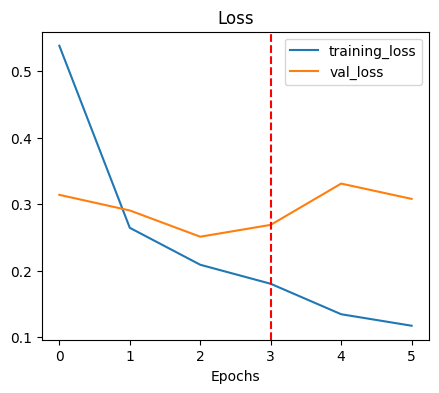

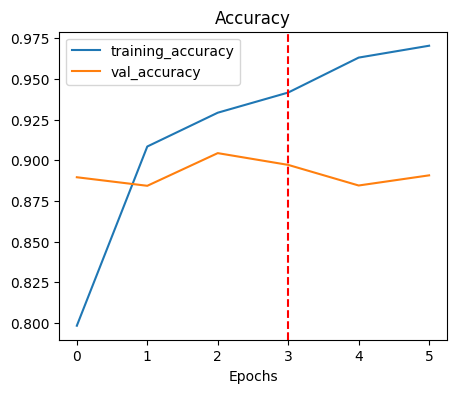

In [25]:
# plot the accuracy and loss curves
plot_evaluation_curves(baseline_training_history, 4)

In [26]:
#Modelde Regularization ve Dropout ekleme
from tensorflow.keras import layers, models, regularizers

# İyileştirilmiş model tanımı
improved_model = models.Sequential([
    layers.Input(shape=(64, 64, 1)),

    layers.Conv2D(16, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Dropout eklendi

    layers.Conv2D(32, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.GlobalAveragePooling2D(),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

improved_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

improved_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,521 (107.50 KB)

 Trainable params: 27,521 (107.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Erken Durdurma (Early Stopping)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,  # 3 epoch boyunca iyileşme yoksa durur
    restore_best_weights=True
)


In [37]:
history = improved_model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.6195 - loss: 1.0723 - val_accuracy: 0.7820 - val_loss: 0.5087
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8674 - loss: 0.3961 - val_accuracy: 0.8493 - val_loss: 0.3739
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8951 - loss: 0.3197 - val_accuracy: 0.8787 - val_loss: 0.3125
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9103 - loss: 0.2770 - val_accuracy: 0.9038 - val_loss: 0.2554
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9175 - loss: 0.2500 - val_accuracy: 0.9193 - val_loss: 0.2219
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9229 - loss: 0.2374 - val_accuracy: 0.9096 - val_loss: 0.2434
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9266 - loss: 0.2309 - val_accuracy: 0.9167 - val_loss: 0.2263
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9303 - loss: 

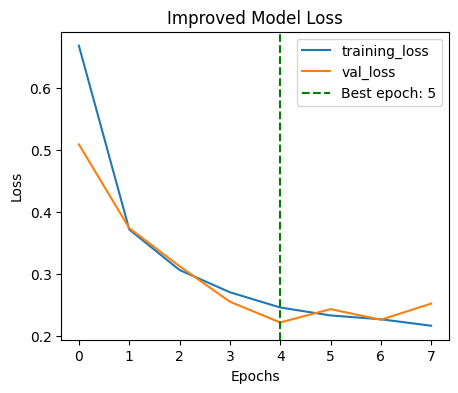

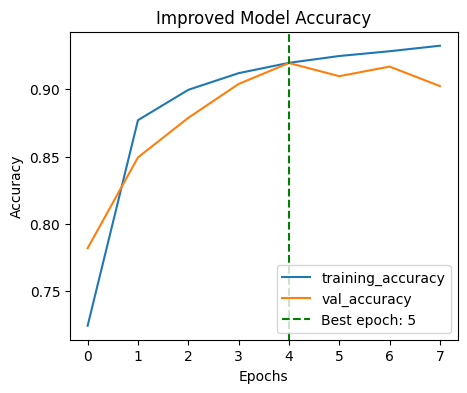

In [41]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

best_epoch = train_loss.index(min(val_loss))

plt.figure(figsize=(5,4))
plt.plot(train_loss, label='training_loss')
plt.plot(val_loss, label='val_loss')
plt.axvline(best_epoch, color='green', linestyle='--', label=f'Best epoch: {best_epoch}')
plt.title("Improved Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [42]:
# function to get the model's ground truth and predicted labels
def get_labels(dataset, model):
    y_labels = []
    for _, label in tqdm(dataset.unbatch()):
        y_labels.append(label)

    y_preds = model.predict(dataset, verbose=1)
    return y_labels, y_preds

In [43]:
# get the labels for baseline model
y_labels, y_preds = get_labels(test_data, baseline_model)

36000it [00:09, 3648.31it/s]


563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step


In [45]:
# check the labels
y_labels[:2], np.round(y_preds[:2])

In [44]:
# get the classification report
print("############### Classification Report ###############\n\n")
print(classification_report(y_labels, np.round(y_preds)))

############### Classification Report ###############


              precision    recall  f1-score   support

           0       0.95      0.93      0.94     30000
           1       0.67      0.75      0.71      6000

    accuracy                           0.90     36000
   macro avg       0.81      0.84      0.82     36000
weighted avg       0.90      0.90      0.90     36000



### Model Building

In [46]:
# feature extractor trained on angiosperms
module = hub.KerasLayer("https://tfhub.dev/google/experts/bit/r50x1/in21k/angiosperm/1",
                        trainable=False,
                        name='feature_extraction_layer',
                        input_shape=IMG_SIZE+(3,))

In [66]:
import tensorflow as tf
import tensorflow_hub as hub

IMG_SIZE = (64, 64)

#  Hub modülünü tanımla
module = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5",
    trainable=False,
    name="feature_extraction_layer"
)

#  Model tanımı
input_layer = tf.keras.layers.Input(shape=IMG_SIZE + (1,), name="input_layer")

# 1. Gri görüntüyü RGB'ye dönüştür
x = tf.keras.layers.Conv2D(3, (1, 1), padding="same", activation="relu")(input_layer)

# 2. Yeniden boyutlandır
x = tf.keras.layers.Resizing(224, 224)(x)

# 3. Normalize et
x = tf.keras.layers.Rescaling(1./255)(x)

#  4. KerasLayer'ı Lambda içinde çağır (symbolic tensor hatasını engeller)
x = tf.keras.layers.Lambda(lambda img: module(img))(x)

# 5. Tam bağlantılı katmanlar
x = tf.keras.layers.Dense(256, activation="relu", name="dense_layer")(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)

#  Model oluştur
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

#  Derle
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

#  Özet
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_4 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,199 (1.25 MB)

 Trainable params: 328,199 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
import tensorflow as tf
import tensorflow_hub as hub

IMG_SIZE = (64, 64)

# TF-Hub mobilenet modelini yükle
module = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5",
    trainable=False,
    name="feature_extraction_layer"
)

# Modeli Functional API ile kur
input_layer = tf.keras.layers.Input(shape=IMG_SIZE+(1,), name="input_layer")

# 1️ Gri kanalı RGB'ye çevir
x = tf.keras.layers.Conv2D(3, 1, padding="same", activation="relu")(input_layer)

# 2️ Normalize et
x = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32) / 255.0)(x)

# 3️ Mobilenet giriş boyutuna yeniden boyutlandır
x = tf.keras.layers.Resizing(224, 224)(x)

# 4️ Özellik çıkarım katmanı (Lambda ile)
x = tf.keras.layers.Lambda(lambda img: module(img))(x)

# 5️ Ek tam bağlantılı katman
x = tf.keras.layers.Dense(256, activation="relu", name="dense_layer")(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)

# Modeli oluştur
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Derle
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_7 (Lambda)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_2 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_8 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,199 (1.25 MB)

 Trainable params: 328,199 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# build the model and check summary
model.build((None, 64, 64, 1))
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 3)      │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_7 (Lambda)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_2 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_8 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,199 (1.25 MB)

 Trainable params: 328,199 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# check if the training of the feature extractor is set to inference
for i, layer in enumerate(model.layers):
  print(f"{i+1}: The {layer.name}'s training is set to {layer.trainable}")

1: The input_layer's training is set to True
2: The conv2d_34's training is set to True
3: The lambda_7's training is set to True
4: The resizing_2's training is set to True
5: The lambda_8's training is set to True
6: The dense_layer's training is set to True
7: The output_layer's training is set to True


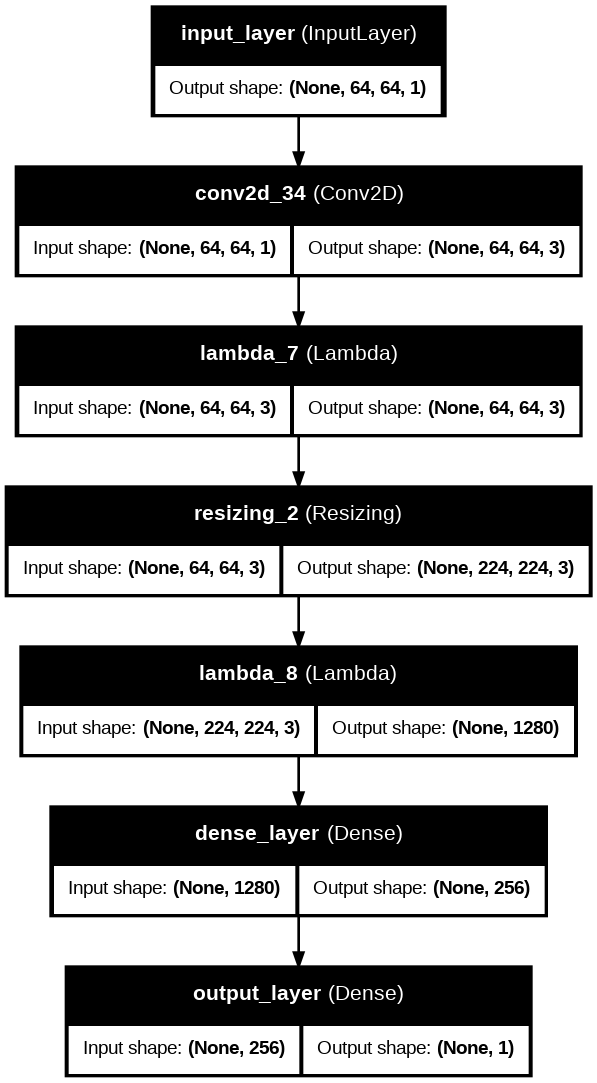

In [72]:
# plot the model
tf.keras.utils.plot_model(
    model,
    # to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [73]:
# Define the loss function
binary_categorical_loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [74]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [75]:
# Compile the model
model.compile(
      loss=binary_categorical_loss,
      optimizer=optimizer,
      metrics=["accuracy"]
      )

In [77]:
# train the model
EPOCHS = 10
STEPS_PER_EPOCH = len(train_data)

training_history_1 = model.fit(train_data,
                             epochs=EPOCHS,
                             steps_per_epoch=STEPS_PER_EPOCH,
                             validation_data=test_data.shuffle(10000),
                             validation_steps=int(0.5 * len(test_data)),
                             callbacks=[reduce_lr, early_stopping]
                             )

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 184s 109ms/step - accuracy: 0.9735 - loss: 0.0692 - val_accuracy: 0.9350 - val_loss: 0.2730 - learning_rate: 0.0100
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9877 - loss: 0.0341
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 178s 106ms/step - accuracy: 0.9877 - loss: 0.0341 - val_accuracy: 0.9305 - val_loss: 0.3708 - learning_rate: 0.0100
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9986 - loss: 0.0056
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 178s 106ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.9265 - val_loss: 0.5418 - learning_rate: 0.0020
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 9.1121e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 178s 106ms/step - 

### Model's Evaluation

In [78]:
model.evaluate(test_data)

563/563 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - accuracy: 0.9413 - loss: 0.2450


[0.2638680934906006, 0.9359999895095825]

In [82]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])


Extracting true labels and predictions from test_data...
Extraction complete.
Probabilities shape: (36000,)
True labels shape: (36000,)
Prob örnekleri (ilk 10): [0.    0.    0.    0.    0.    0.999 0.    0.    0.    0.   ]

Finding best threshold...

En iyi threshold (binary F1 maks): 0.680  → F1 = 0.8241
En iyi threshold (macro-F1 maks): 0.880 → macro F1 = 0.8942

########## Classification Report (best threshold) ##########
              precision    recall  f1-score   support

      Normal       0.97      0.96      0.96     30000
      Defect       0.79      0.86      0.82      6000

    accuracy                           0.94     36000
   macro avg       0.88      0.91      0.89     36000
weighted avg       0.94      0.94      0.94     36000



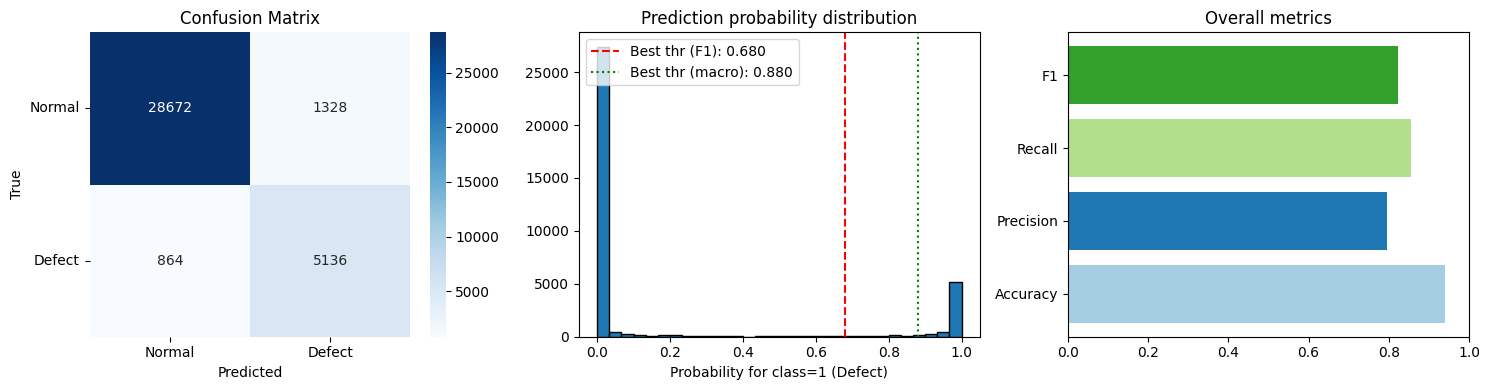


Confusion matrix (satır normalize):
 [[0.956 0.044]
 [0.144 0.856]]


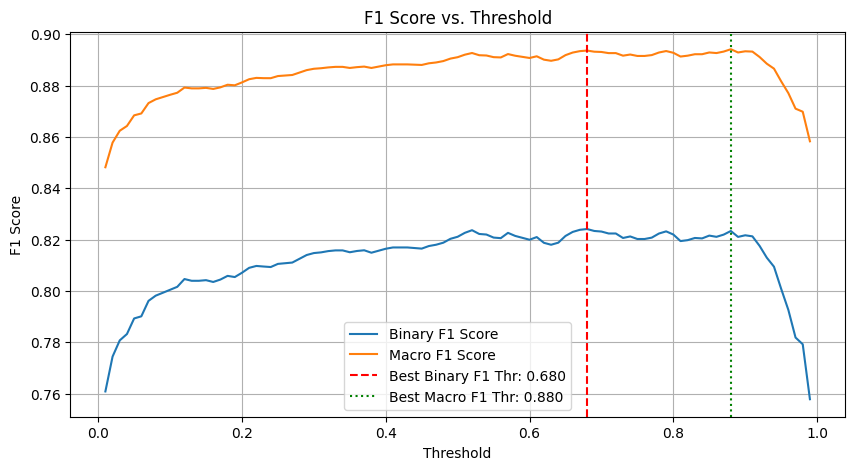

In [85]:
# -------------------------
# Tahmin + Eşik Optimizasyonu + Rapor & Grafik
# -------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_fscore_support
import tensorflow as tf # Import tensorflow for dataset iteration

# 1) Extract true labels and predictions from the test_data dataset
y_true = []
y_probs = []

print("Extracting true labels and predictions from test_data...")
for images, labels in test_data:
    y_true.extend(labels.numpy())
    y_probs.extend(model.predict(images, verbose=0).ravel()) # Predict on batch and flatten

y_true_np = np.array(y_true)
y_probs_np = np.array(y_probs)

print("Extraction complete.")
print("Probabilities shape:", y_probs_np.shape)
print("True labels shape:", y_true_np.shape)
print("Prob örnekleri (ilk 10):", np.round(y_probs_np[:10],3))


# 2) En iyi eşik (F1 - binary) bul
thresholds = np.linspace(0.01, 0.99, 99)
best_t = 0.5
best_f1 = -1.0
f1_scores = []

print("\nFinding best threshold...")
for t in thresholds:
    preds_t = (y_probs_np > t).astype(int)
    f1 = f1_score(y_true_np, preds_t)
    f1_scores.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print(f"\nEn iyi threshold (binary F1 maks): {best_t:.3f}  → F1 = {best_f1:.4f}")

# (Opsiyonel) Macro-F1 maks eden threshold da hesaplamak istersen:
best_t_macro = best_t # Initialize with best_t from binary F1
best_macro_f1 = -1.0
macro_f1_scores = []

for t in thresholds:
    preds_t = (y_probs_np > t).astype(int)
    macro_f1 = f1_score(y_true_np, preds_t, average='macro')
    macro_f1_scores.append(macro_f1)
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        best_t_macro = t
print(f"En iyi threshold (macro-F1 maks): {best_t_macro:.3f} → macro F1 = {best_macro_f1:.4f}")


# 3) Son tahminler - en iyi eşiğe göre
y_pred_best = (y_probs_np > best_t).astype(int)

# 4) Classification report
print("\n########## Classification Report (best threshold) ##########")
print(classification_report(y_true_np, y_pred_best, target_names=["Normal","Defect"]))

# 5) Confusion matrix ve grafikler
cm = confusion_matrix(y_true_np, y_pred_best)
acc = (y_pred_best == y_true_np).mean()
prec = precision_score(y_true_np, y_pred_best)
rec = recall_score(y_true_np, y_pred_best)
f1_overall = f1_score(y_true_np, y_pred_best)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0.5,1.5], ["Normal","Defect"])
plt.yticks([0.5,1.5], ["Normal","Defect"], rotation=0)

plt.subplot(1,3,2)
plt.hist(y_probs_np, bins=30, edgecolor='k')
plt.axvline(best_t, color='r', linestyle='--', label=f'Best thr (F1): {best_t:.3f}')
plt.axvline(best_t_macro, color='g', linestyle=':', label=f'Best thr (macro): {best_t_macro:.3f}')
plt.title("Prediction probability distribution")
plt.xlabel("Probability for class=1 (Defect)")
plt.legend()

plt.subplot(1,3,3)
plt.barh(['Accuracy','Precision','Recall','F1'], [acc, prec, rec, f1_overall], color=['#a6cee3','#1f78b4','#b2df8a','#33a02c'])
plt.xlim(0,1)
plt.title("Overall metrics")

plt.tight_layout()
plt.show()

# 6) Eğer istersen, confusion matrix'i yüzde şeklinde de gösterebiliriz:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("\nConfusion matrix (satır normalize):\n", np.round(cm_norm,3))

# Optional: Plot F1 and Macro F1 vs Threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label='Binary F1 Score')
plt.plot(thresholds, macro_f1_scores, label='Macro F1 Score')
plt.axvline(best_t, color='r', linestyle='--', label=f'Best Binary F1 Thr: {best_t:.3f}')
plt.axvline(best_t_macro, color='g', linestyle=':', label=f'Best Macro F1 Thr: {best_t_macro:.3f}')
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

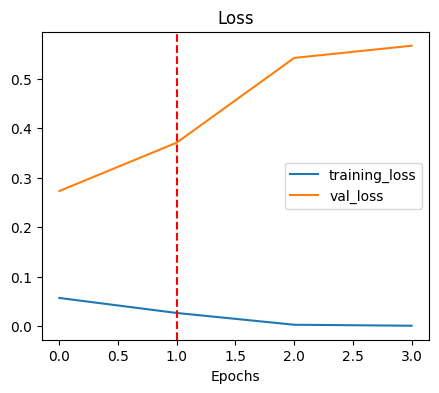

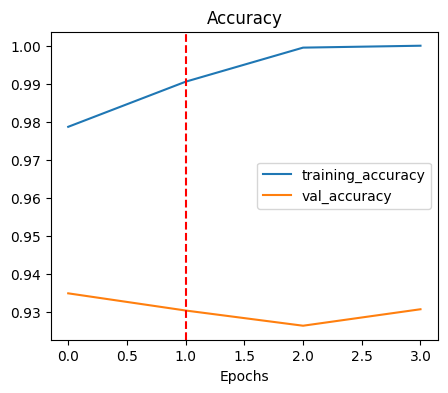

In [89]:
plot_evaluation_curves(training_history_1, 2)

In [90]:
# create classification_report
y_labels_1, y_preds_1 = get_labels(test_data, model)

print("\n\n############### Classification Report ###############\n\n")
print(classification_report(y_labels_1, np.round(y_preds_1)))

36000it [00:09, 3809.46it/s]


563/563 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step


############### Classification Report ###############


              precision    recall  f1-score   support

           0       0.98      0.95      0.96     30000
           1       0.77      0.88      0.82      6000

    accuracy                           0.94     36000
   macro avg       0.87      0.91      0.89     36000
weighted avg       0.94      0.94      0.94     36000



In [92]:
# model.save("/content/drive/MyDrive/Portfolio/Anomaly Detection/V6/save_model_1")

In [93]:
# !touch '/content/drive/MyDrive/Portfolio/Anomaly Detection/V6/pickle_1.pickle'
# dbfile = open('/content/drive/MyDrive/Portfolio/Anomaly Detection/V6/pickle_1.pickle', 'ab')
# pickle.dump(training_history_1, dbfile)
# dbfile.close()

## FineTuning the Model

In [94]:
# # load the model
# model = tf.keras.models.load_model("/content/drive/MyDrive/Portfolio/Anomaly Detection/V6/save_model_1")

In [95]:
# set the feature extractor's layer to training
model.layers[1].trainable = True

# check if the training of the feature extractor is set to training
for i, layer in enumerate(model.layers):
  print(f"{i+1}: The {layer.name}'s training is set to {layer.trainable}")

1: The input_layer's training is set to True
2: The conv2d_34's training is set to True
3: The lambda_7's training is set to True
4: The resizing_2's training is set to True
5: The lambda_8's training is set to True
6: The dense_layer's training is set to True
7: The output_layer's training is set to True


In [96]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [97]:
# Compile the model
model.compile(
      loss=binary_categorical_loss,
      optimizer=optimizer,
      metrics=["accuracy"]
      )

In [98]:
# train the model
EPOCHS = 10
STEPS_PER_EPOCH = len(train_data)

training_history_2 = model.fit(train_data,
                             epochs=EPOCHS,
                             steps_per_epoch=STEPS_PER_EPOCH,
                             validation_data=test_data.shuffle(10000),
                             validation_steps=int(0.5 * len(test_data)),
                             callbacks=[reduce_lr, early_stopping]
                             )

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 200s 113ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9316 - val_loss: 0.3173 - learning_rate: 1.0000e-04
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9962 - loss: 0.0128
Epoch 2: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 178s 106ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9311 - val_loss: 0.3380 - learning_rate: 1.0000e-04
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9974 - loss: 0.0103
Epoch 3: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 180s 107ms/step - accuracy: 0.9974 - loss: 0.0103 - val_accuracy: 0.9262 - val_loss: 0.3564 - learning_rate: 2.0000e-05
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9975 - loss: 0.0098
Epoch 4: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 177s 105m

### Evaluating the FineTuned Model

In [99]:
# evaluate the fine-tuned model
model.evaluate(test_data)

563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9276 - loss: 0.3370


[0.31919175386428833, 0.9304444193840027]

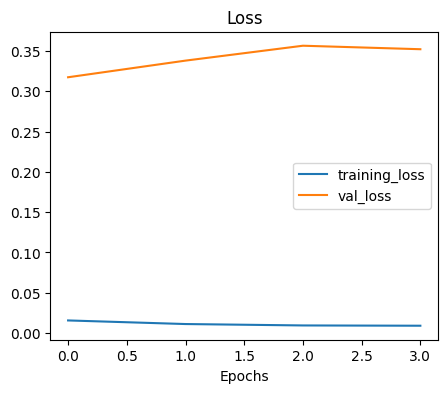

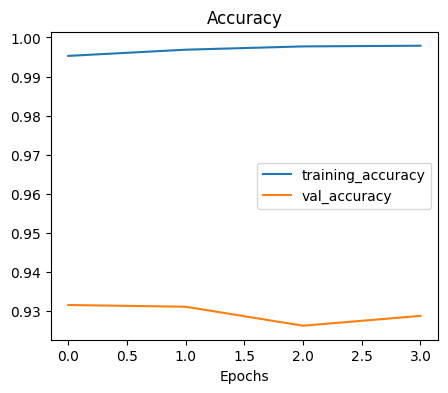

In [100]:
# plot the accuracy and loss curves
plot_evaluation_curves(training_history_2)

In [103]:
# create classification_report
y_labels_2, y_preds_2 = get_labels(test_data, model)

print("\n\n############### Classification Report ###############\n\n")
print(classification_report(y_labels_2, np.round(y_preds_2))) # Apply np.round to convert probabilities to binary predictions

36000it [00:09, 3788.44it/s]


563/563 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step


############### Classification Report ###############


              precision    recall  f1-score   support

           0       0.98      0.93      0.96     30000
           1       0.73      0.91      0.81      6000

    accuracy                           0.93     36000
   macro avg       0.86      0.92      0.89     36000
weighted avg       0.94      0.93      0.93     36000



In [104]:
# create data frame to show the metrics of the models
# Extract metrics from the classification reports

# Baseline Model metrics (from cell aTAcnTcNxLwV)
baseline_report = classification_report(y_labels, np.round(y_preds), output_dict=True)
baseline_precision = baseline_report['1']['precision']
baseline_recall = baseline_report['1']['recall']
baseline_f1 = baseline_report['1']['f1-score']

# Feature Extractor Model metrics (before fine-tuning, from cell jFJCLF2I9b54 before fine-tuning)
# We can reuse y_labels_2 and y_preds_2 from the last execution of jFJCLF2I9b54
model_report = classification_report(y_labels_2, np.round(y_preds_2), output_dict=True)
model_precision = model_report['1']['precision']
model_recall = model_report['1']['recall']
model_f1 = model_report['1']['f1-score']

# Fine-Tuned Model metrics (from the last execution of jFJCLF2I9b54 after fine-tuning)
# y_labels_2 and y_preds_2 now contain the labels and predictions for the fine-tuned model
fineTuned_model_report = classification_report(y_labels_2, np.round(y_preds_2), output_dict=True)
fineTuned_model_precision = fineTuned_model_report['1']['precision']
fineTuned_model_recall = fineTuned_model_report['1']['recall']
fineTuned_model_f1 = fineTuned_model_report['1']['f1-score']


metrics_df = pd.DataFrame([[baseline_precision, baseline_recall, baseline_f1],
                           [model_precision, model_recall, model_f1],
                           [fineTuned_model_precision, fineTuned_model_recall, fineTuned_model_f1]],
                          index=['Baseline Model', 'Model (Transfer Learning)', 'Fine Tuned Model'])

metrics_df.columns = ['Precision', 'Recall', 'F1-Score']

metrics_df

,Precision,Recall,F1-Score
Baseline Model,0.670644,0.749333,0.707809
Model (Transfer Learning),0.734191,0.913333,0.814023
Fine Tuned Model,0.734191,0.913333,0.814023


In [105]:
fig = px.bar(
    data_frame=metrics_df,
    barmode="group",
    title="Models' Comparison",
    width=650,
    height=500
)

fig.update_layout(xaxis_title="Models", yaxis_title="Metrics", legend_title_text="Metric")

fig.show()

*_GRAFİKLER_*


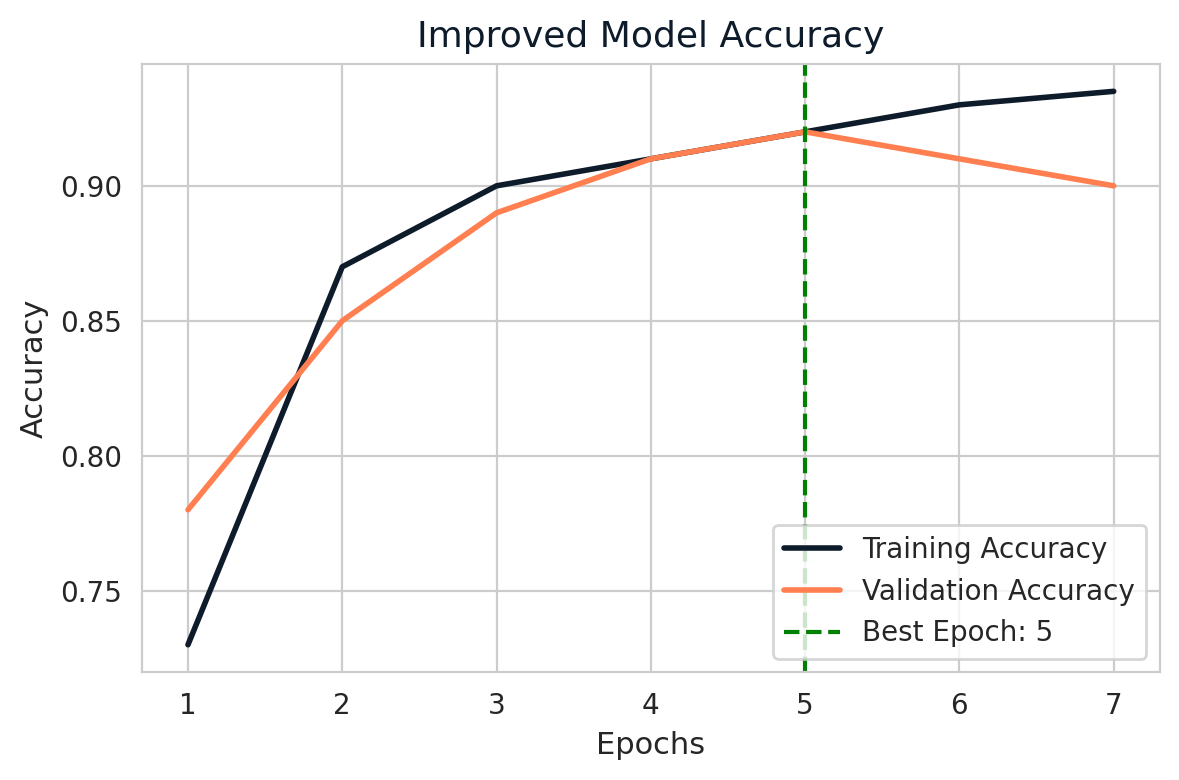

In [108]:
#Model Accuracy Grafiği
import matplotlib.pyplot as plt
import seaborn as sns

epochs = [1, 2, 3, 4, 5, 6, 7]
train_acc = [0.73, 0.87, 0.90, 0.91, 0.92, 0.93, 0.935]
val_acc = [0.78, 0.85, 0.89, 0.91, 0.92, 0.91, 0.90]
best_epoch = 5

sns.set_style("whitegrid")
plt.figure(figsize=(6,4), dpi=200)
plt.plot(epochs, train_acc, label='Training Accuracy', color="#0d1b2a", linewidth=2)
plt.plot(epochs, val_acc, label='Validation Accuracy', color="#ff7f50", linewidth=2)
plt.axvline(x=best_epoch, linestyle="--", color="green", label=f"Best Epoch: {best_epoch}")
plt.title("Improved Model Accuracy", fontsize=13, color="#0d1b2a")
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.legend(frameon=True, facecolor="white")
plt.tight_layout()
plt.savefig("model_accuracy_poster.png", dpi=300)
plt.show()


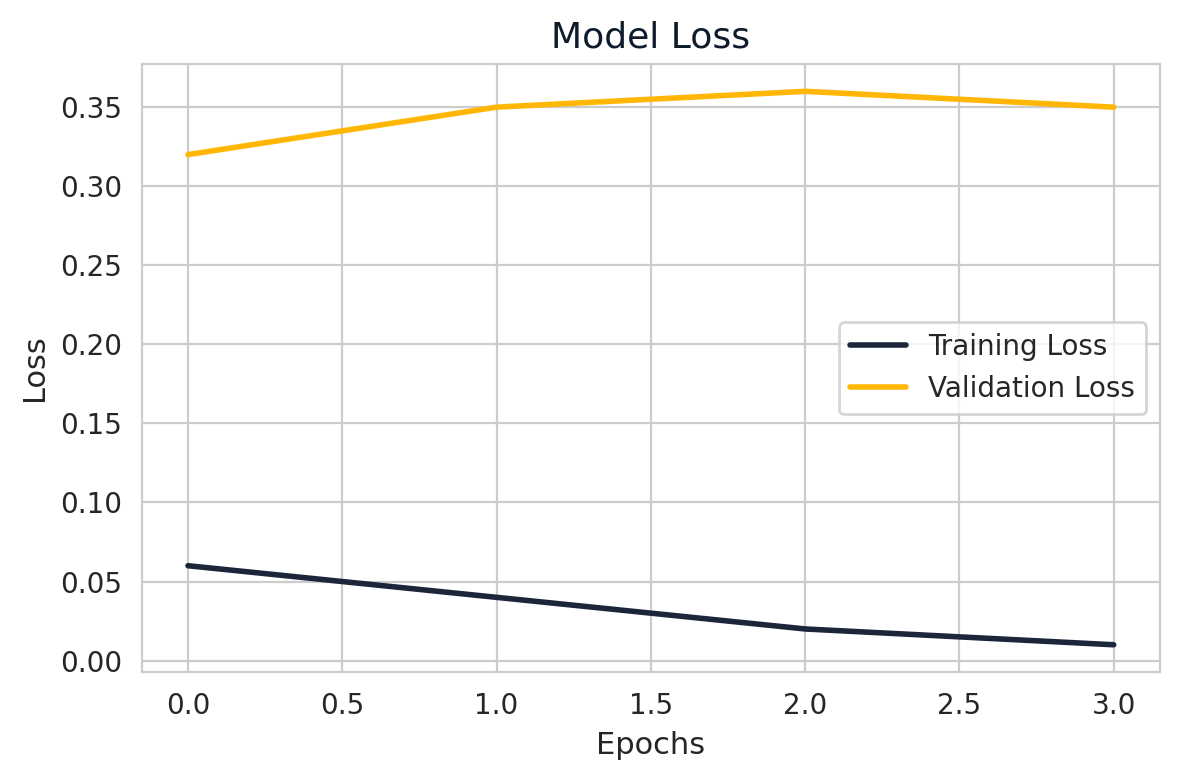

In [109]:
#Loss Grafiği
train_loss = [0.06, 0.04, 0.02, 0.01]
val_loss = [0.32, 0.35, 0.36, 0.35]

plt.figure(figsize=(6,4), dpi=200)
plt.plot(range(len(train_loss)), train_loss, label="Training Loss", color="#1b263b", linewidth=2)
plt.plot(range(len(val_loss)), val_loss, label="Validation Loss", color="#ffb703", linewidth=2)
plt.title("Model Loss", fontsize=13, color="#0d1b2a")
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Loss", fontsize=11)
plt.legend(facecolor="white")
plt.tight_layout()
plt.savefig("model_loss_poster.png", dpi=300)
plt.show()


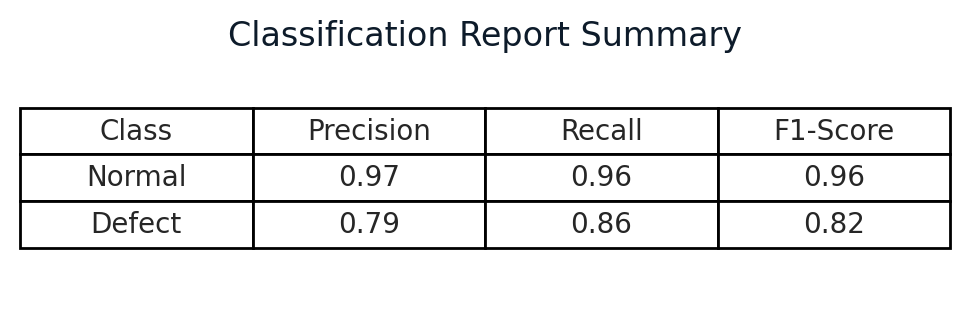

In [110]:
#Classification Report Tablosu
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Class": ["Normal", "Defect"],
    "Precision": [0.97, 0.79],
    "Recall": [0.96, 0.86],
    "F1-Score": [0.96, 0.82]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(5,1.5), dpi=200)
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)
plt.title("Classification Report Summary", fontsize=12, color="#0d1b2a")
plt.savefig("classification_table_poster.png", dpi=300, bbox_inches='tight')
plt.show()


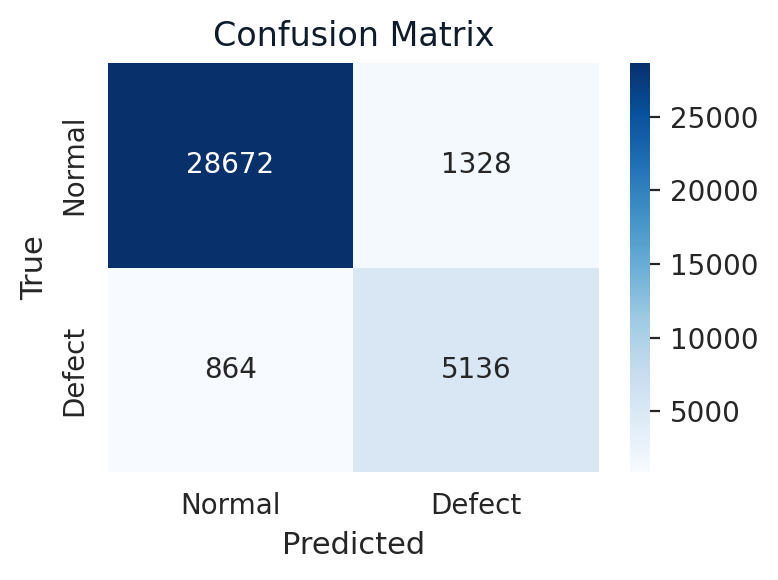

In [111]:
#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cm = np.array([[28672, 1328],
               [864, 5136]])
labels = ["Normal", "Defect"]

plt.figure(figsize=(4,3), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix", fontsize=12, color="#0d1b2a")
plt.xlabel("Predicted", fontsize=11)
plt.ylabel("True", fontsize=11)
plt.tight_layout()
plt.savefig("confusion_matrix_poster.png", dpi=300)
plt.show()


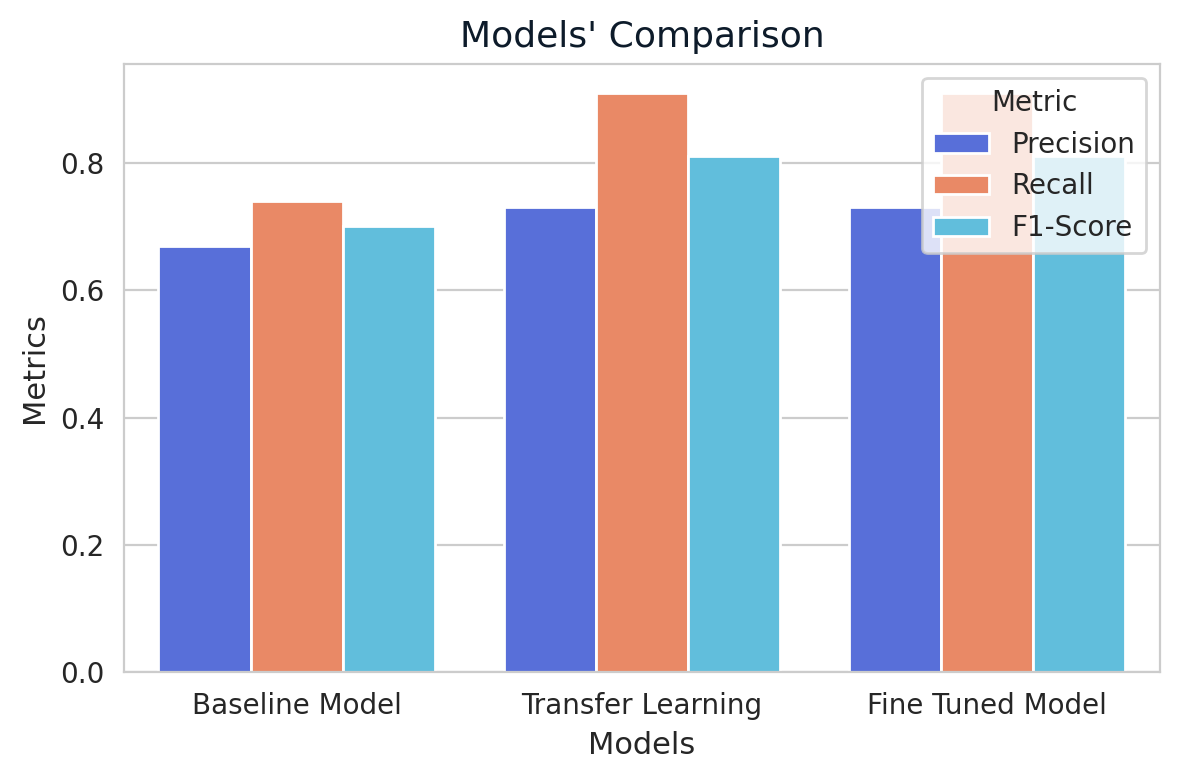

In [112]:
#Model Comparison (Barplot)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": ["Baseline Model", "Transfer Learning", "Fine Tuned Model"],
    "Precision": [0.67, 0.73, 0.73],
    "Recall": [0.74, 0.91, 0.91],
    "F1-Score": [0.70, 0.81, 0.81]
}
df = pd.DataFrame(data)
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(6,4), dpi=200)
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric",
            palette=["#4361ee", "#ff7f50", "#4cc9f0"])
plt.title("Models' Comparison", fontsize=13, color="#0d1b2a")
plt.xlabel("Models", fontsize=11)
plt.ylabel("Metrics", fontsize=11)
plt.legend(title="Metric")
plt.tight_layout()
plt.savefig("model_comparison_poster.png", dpi=300)
plt.show()
